In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#测试样本的数量
parameter=30

In [2]:
data=pd.DataFrame(index=range(0,parameter),columns=('probability','The true label'))
data['The true label']=np.random.randint(0,2,size=len(data))
data['probability']=np.random.choice(np.arange(0.1,1,0.1),len(data['probability']))

In [3]:
data

,probability,The true label
0,0.8,1
1,0.3,0
2,0.9,1
3,0.3,1
4,0.2,1
5,0.7,1
6,0.2,0
7,0.2,1
8,0.5,0
9,0.4,0


In [ ]:
cm=np.arange(4).reshape(2,2)
cm[0,0]=len(data[data['The ture label']==0][data['probability']<0.5]) #TN
cm[0,1]=len(data[data['The ture label']==0][data['probability']>=0.5])#FP
cm[1,0]=len(data[data['The ture label']==1][data['probability']<0.5]) #FN
cm[1,1]=len(data[data['The ture label']==1][data['probability']>=0.5])#TP

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(data['The true label'], data['probability']>=0.5)

In [13]:
from fastai.plots import *

[[ 3  6]
 [12  9]]


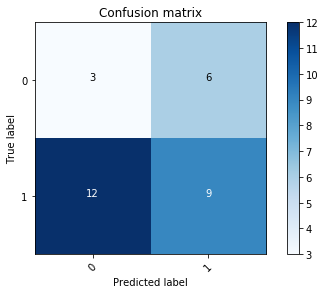

In [15]:
plot_confusion_matrix(cm,{0:"true",1:"false"})

In [16]:
# 按预测概率从大到小的顺序排序：
data.sort_values('probability',inplace=True,ascending=False)

In [20]:
# 然后从上到下的概率值作为阈值，给出 真阳率和伪阳率
TPRandFPR=pd.DataFrame(index=range(len(data)),columns=('TP','FP'))

for j in range(len(data)):    
    data1=data.head(n=j+1)    
    # 伪阳率
    FP=len(data1[data1['The true label']==0] [data1['probability']>=data1.head(len(data1))['probability']])/float(len(data[data['The true label']==0]))    
    # 真阳率
    TP=len(data1[data1['The true label']==1][data1['probability']>=data1.head(len(data1))['probability']])/float(len(data[data['The true label']==1]))     
    TPRandFPR.iloc[j]=[TP,FP]

/mnt/wc/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/mnt/wc/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [21]:
TPRandFPR

,TP,FP
0,0.047619,0
1,0.047619,0.111111
2,0.0952381,0.111111
3,0.142857,0.111111
4,0.142857,0.222222
5,0.190476,0.222222
6,0.238095,0.222222
7,0.285714,0.222222
8,0.333333,0.222222
9,0.380952,0.222222


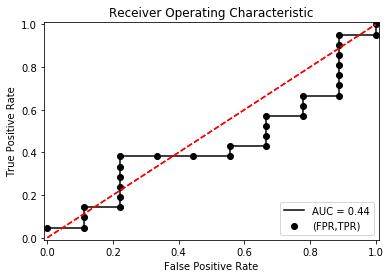

In [22]:
from sklearn.metrics import auc
AUC= auc(TPRandFPR['FP'],TPRandFPR['TP'])
plt.scatter(x=TPRandFPR['FP'],y=TPRandFPR['TP'],label='(FPR,TPR)',color='k')
plt.plot(TPRandFPR['FP'], TPRandFPR['TP'], 'k',label='AUC = %0.2f'% AUC)
plt.legend(loc='lower right')
plt.title('Receiver Operating Characteristic')
plt.plot([(0,0),(1,1)],'r--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,01.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()